In [1]:
import numpy as np  
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt

In [2]:
def exponential_decay(t, y): return -0.5 * y
sol = solve_ivp(exponential_decay, [0, 10], [2, 4, 8])
print(sol.t)
print(sol.y)

[ 0.          0.11487653  1.26364188  3.06061781  4.81611105  6.57445806
  8.33328988 10.        ]
[[2.         1.88836035 1.06327177 0.43319312 0.18017253 0.07483045
  0.03107158 0.01350781]
 [4.         3.7767207  2.12654355 0.86638624 0.36034507 0.14966091
  0.06214316 0.02701561]
 [8.         7.5534414  4.25308709 1.73277247 0.72069014 0.29932181
  0.12428631 0.05403123]]


In [3]:
def upward_cannon(t, y): return [y[1], -0.5]
sol = solve_ivp(upward_cannon, [0, 100], [0, 10])
print(sol.t)

[0.00000000e+00 9.99900010e-05 1.09989001e-03 1.10988901e-02
 1.11088891e-01 1.11098890e+00 1.11099890e+01 1.00000000e+02]


In [4]:
def hit_ground(t, y): return y[1]
hit_ground.terminal = True
hit_ground.direction = -1
sol = solve_ivp(upward_cannon, [0, 100], [0, 10], events=hit_ground)
print(sol.t_events)
print(sol.t)

[array([20.])]
[0.00000000e+00 9.99900010e-05 1.09989001e-03 1.10988901e-02
 1.11088891e-01 1.11098890e+00 1.11099890e+01 2.00000000e+01]


In [5]:
def rhs(t,Y,myparams):
    a,b,c = myparams
    dY = np.zeros_like(Y)
    k = 1.0
    dY[0] = k - (1 - 5/Y[1])*(3+2/Y[1])
    dY[1] = Y[0]
    dY[2] = 1/Y[1]**2
    return dY

ylast [0. 4. 8.]
sol.t [0.00000000e+00 7.54105843e-04 8.29516427e-03 8.37057486e-02
 6.98575662e-01 1.67402671e+00 2.91422685e+00 4.70496600e+00
 7.21827204e+00 9.73157807e+00 1.00000000e+01]
(3, 11)
last sol.t [-2.0193991   5.87405965  8.17716578]


Text(0.5, 0, 't')

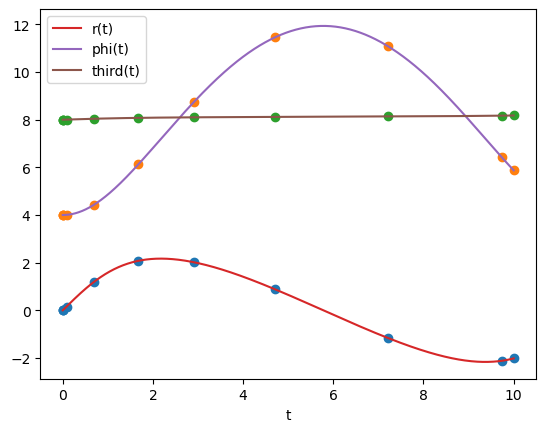

In [8]:
params = [1,2,3]
ylast = np.array([0.0,4.0,8.0]) 
print('ylast',ylast)
sol = solve_ivp(rhs, [0,10], ylast, args=(params,), dense_output=True)

print('sol.t',sol.t)
print(np.shape(sol.y))
print('last sol.t',sol.y[:,-1])
plt.figure()
plt.plot(sol.t,sol.y.T,'o')

t = np.linspace(0, 10, 1001) 
Y = sol.sol(t) 
plt.plot(t, Y[0],'-', label='r(t)') 
plt.plot(t, Y[1],'-', label='phi(t)')
plt.plot(t, Y[2],'-', label='third(t)')
plt.legend(loc='best')
plt.xlabel('t')

[ 0.          0.12871675  1.4158842   2.76963711  4.04860733  5.55951823
  8.15264614 10.        ]
(3, 8)


Text(0.5, 0, 't')

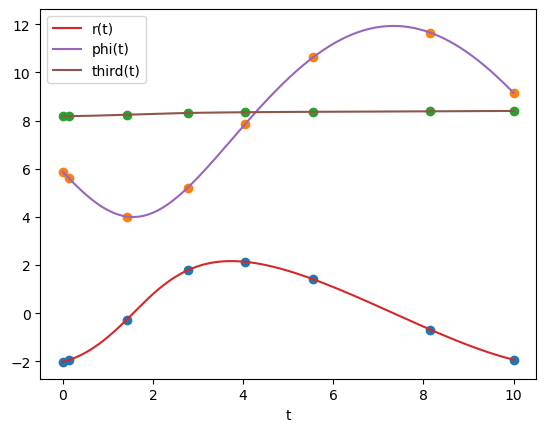

In [7]:
ylast = sol.y[:,-1]
sol = solve_ivp(rhs, [0,10], ylast, args=(params,), dense_output=True)

print(sol.t)
print(np.shape(sol.y))
plt.figure()
plt.plot(sol.t,sol.y.T,'o')

t = np.linspace(0, 10, 1001) 
Y = sol.sol(t) 
plt.plot(t, Y[0],'-', label='r(t)') 
plt.plot(t, Y[1],'-', label='phi(t)')
plt.plot(t, Y[2],'-', label='third(t)')
plt.legend(loc='best')
plt.xlabel('t')